In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
!pip install apriori_python efficient-apriori fpgrowth_py pyarmviz numpy pandas matplotlib seaborn  scikit-learn matplotlib umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import numpy as np
import random
import pandas as pd
import seaborn as sns
import warnings

import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.manifold import TSNE
from umap import UMAP


warnings.filterwarnings("ignore")

%matplotlib inline

Counter({1: 225, 2: 81})
Counter({1: 225, 2: 81})
dict_items([(1, 225), (2, 81)])
[1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 2
 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 2 1 1 1 2 2 2 1 1 1 1 1 1 1 1 2 2 2 1
 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 1 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1
 1 1 1 1 1 2 2 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 2
 2 2 2 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 1 1 2 2]


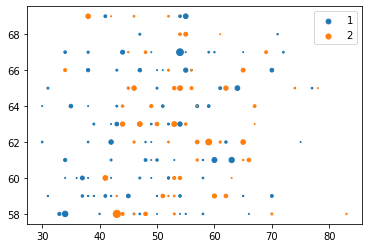

(306, 2)


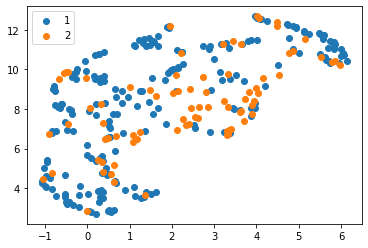

(306, 2)


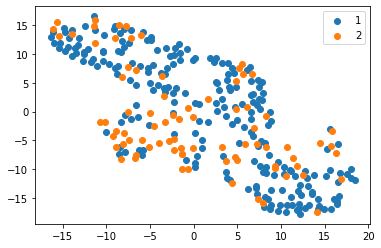

In [65]:

# Oversample with SMOTE and random undersample for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from matplotlib import pyplot
from numpy import where
# define dataset
'''For viz dataframe bewfore sampling'''

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv', delimiter=';')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Age', 'Operation', 'Nodes']]
y = df['Status']
# summarize class distribution
counter = Counter(y)
print(counter)


X = X.to_numpy()
y = y.to_numpy()
print(y)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = TSNE()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({1: 225, 2: 225})
dict_items([(1, 225), (2, 225)])
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


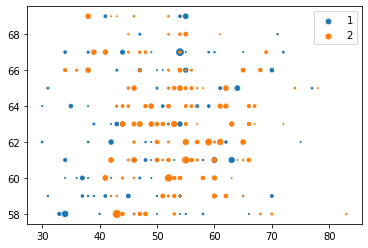

(450, 2)


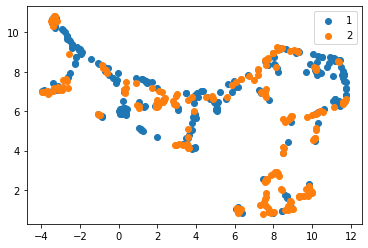

(450, 2)


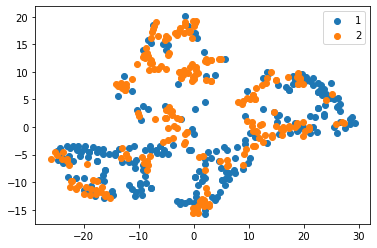

In [66]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv', delimiter=';')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Age', 'Operation', 'Nodes']]
y = df['Status']
X = X.to_numpy()
y = y.to_numpy()

# define pipeline
over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

print(y)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = TSNE()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

ROC without SMOTE

In [67]:
# decision tree evaluated on imbalanced dataset
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv', delimiter=';')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Age', 'Operation', 'Nodes']]
y = df['Status']
X = X.to_numpy()
y = y.to_numpy()

# define model
model = DecisionTreeClassifier()
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.550


ROC with SMOTE

In [68]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv', delimiter=';')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Age', 'Operation', 'Nodes']]
y = df['Status']
X = X.to_numpy()
y = y.to_numpy()

# define pipeline
steps = [('over', SMOTE()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.547


UnderSampling accuracy

In [73]:
# decision tree evaluated on imbalanced dataset with SMOTE oversampling
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import *
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv', delimiter=';')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Age', 'Operation', 'Nodes']]
y = df['Status']
X = X.to_numpy()
y = y.to_numpy()



def compare_undersamplers(underSampler, overSampler=SMOTE ,classifier=SVC, scoring = "f1"):
    # values to evaluate
    k_values = [1, 2, 3, 4, 5, 6, 7]
    for k in k_values:
      # define pipeline
      model = classifier()
      over = overSampler( k_neighbors=k)
      under = underSampler()
      steps = [('over', over), ('under', under), ('model', model)]
      pipeline = Pipeline(steps=steps)
      # evaluate pipeline
      cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
      scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)
      score = mean(scores)
      print('> %s k=%d, Mean %s: %.3f' % (under.__class__.__name__, k, scoring, score))
    print()

compare_undersamplers(ClusterCentroids)
compare_undersamplers(CondensedNearestNeighbour)
compare_undersamplers(EditedNearestNeighbours)
compare_undersamplers(RepeatedEditedNearestNeighbours)
compare_undersamplers(AllKNN)
compare_undersamplers(InstanceHardnessThreshold)
compare_undersamplers(NearMiss)
compare_undersamplers(NeighbourhoodCleaningRule)
compare_undersamplers(OneSidedSelection)
compare_undersamplers(RandomUnderSampler)
compare_undersamplers(TomekLinks)

> ClusterCentroids k=1, Mean f1: 0.826
> ClusterCentroids k=2, Mean f1: 0.832
> ClusterCentroids k=3, Mean f1: 0.827
> ClusterCentroids k=4, Mean f1: 0.829
> ClusterCentroids k=5, Mean f1: 0.828
> ClusterCentroids k=6, Mean f1: 0.827
> ClusterCentroids k=7, Mean f1: 0.827

> CondensedNearestNeighbour k=1, Mean f1: 0.847
> CondensedNearestNeighbour k=2, Mean f1: 0.847
> CondensedNearestNeighbour k=3, Mean f1: 0.847
> CondensedNearestNeighbour k=4, Mean f1: 0.847
> CondensedNearestNeighbour k=5, Mean f1: 0.847
> CondensedNearestNeighbour k=6, Mean f1: 0.847
> CondensedNearestNeighbour k=7, Mean f1: 0.847

> EditedNearestNeighbours k=1, Mean f1: 0.844
> EditedNearestNeighbours k=2, Mean f1: 0.846
> EditedNearestNeighbours k=3, Mean f1: 0.843
> EditedNearestNeighbours k=4, Mean f1: 0.842
> EditedNearestNeighbours k=5, Mean f1: 0.845
> EditedNearestNeighbours k=6, Mean f1: 0.849
> EditedNearestNeighbours k=7, Mean f1: 0.847

> RepeatedEditedNearestNeighbours k=1, Mean f1: 0.840
> RepeatedEd

Counter({1: 225, 2: 81})
Counter({1: 225, 2: 225})


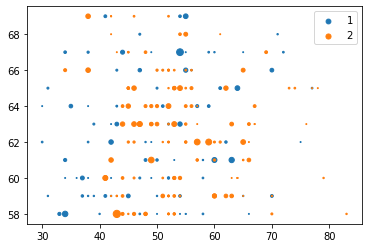

(450, 2)


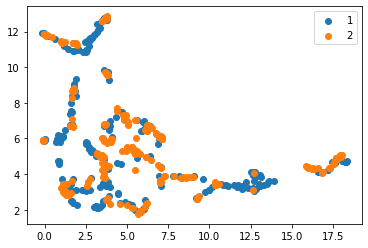

(450, 2)


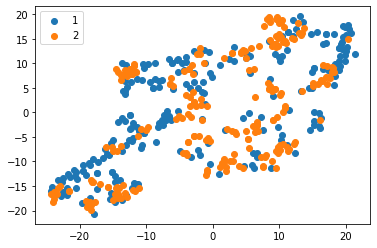

In [70]:
# borderline-SMOTE for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import BorderlineSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv', delimiter=';')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Age', 'Operation', 'Nodes']]
y = df['Status']
X = X.to_numpy()
y = y.to_numpy()
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = BorderlineSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = TSNE()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({1: 225, 2: 81})
Counter({1: 225, 2: 225})


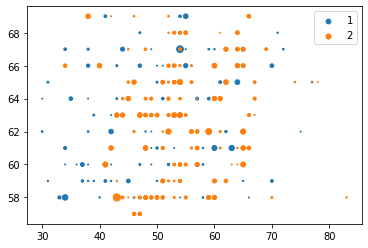

(450, 2)


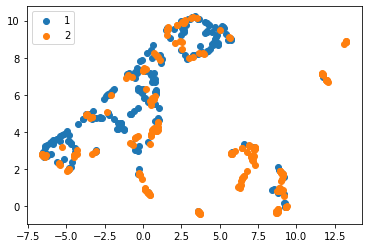

(450, 2)


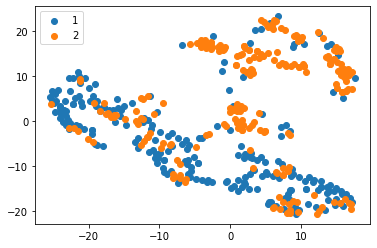

In [71]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv', delimiter=';')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Age', 'Operation', 'Nodes']]
y = df['Status']
X = X.to_numpy()
y = y.to_numpy()
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = TSNE()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

Counter({1: 225, 2: 81})
Counter({2: 231, 1: 225})


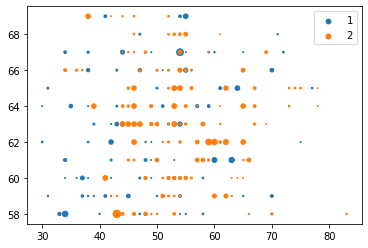

(456, 2)


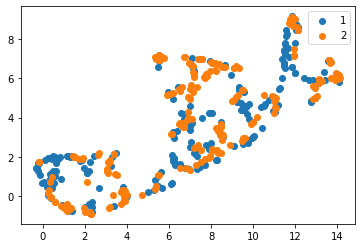

(456, 2)


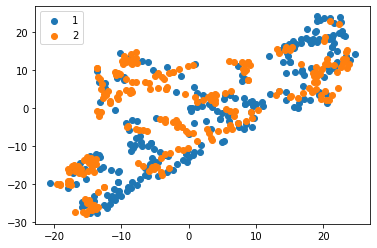

In [72]:
# Oversample and plot imbalanced dataset with ADASYN
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN
from matplotlib import pyplot
from numpy import where
# define dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/haberman.csv', delimiter=';')

# X = df[['Ca', 'Na']]
# y = df['classes']
# df = df[:146]
X = df[['Age', 'Operation', 'Nodes']]
y = df['Status']
X = X.to_numpy()
y = y.to_numpy()
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = ADASYN()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], X[row_ix, 2], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = UMAP()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


scaled_data = X
#preprocessing.StandardScaler().fit_transform(X)
reducer = TSNE()
embedded = reducer.fit_transform(scaled_data)
print(embedded.shape)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(embedded[row_ix, 0], embedded[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()